In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,author,artist,title,genre,date,review_abstract,score,target,year,month,self-titled,sophomore,EP,reading_ease,grade_level,word_count,high,remastered
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,medium,2020,September,0,0,0,56.59,11,23,0,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,medium,2020,September,0,0,0,64.71,8,30,0,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,high,2020,September,0,0,0,25.12,17,29,1,0
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,medium,2020,September,0,0,0,73.51,8,23,0,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,medium,2020,September,0,0,0,71.14,7,17,0,0


In [4]:
df.dtypes

author              object
artist              object
title               object
genre               object
date                object
review_abstract     object
score              float64
target              object
year                 int64
month               object
self-titled          int64
sophomore            int64
EP                   int64
reading_ease       float64
grade_level          int64
word_count           int64
high                 int64
remastered           int64
dtype: object

In [5]:
dummies_genre = pd.get_dummies(df['genre']).rename(columns=lambda x: 'genre_' + str(x))
dummies_target = pd.get_dummies(df['target']).rename(columns=lambda x: 'target_' + str(x))
dummies_year = pd.get_dummies(df['year']).rename(columns=lambda x: 'year_' + str(x))
dummies_month = pd.get_dummies(df['month']).rename(columns=lambda x: 'month_' + str(x))
dummies_grade_level = pd.get_dummies(df['grade_level']).rename(columns=lambda x: 'grade_level_' + str(x))

df = pd.concat([df, dummies_genre, dummies_target, dummies_year, dummies_month, dummies_grade_level], axis=1)
df.head()

,author,artist,title,genre,date,review_abstract,score,target,year,month,...,grade_level_22,grade_level_23,grade_level_24,grade_level_25,grade_level_26,grade_level_27,grade_level_28,grade_level_29,grade_level_31,grade_level_32
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,medium,2020,September,...,0,0,0,0,0,0,0,0,0,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,medium,2020,September,...,0,0,0,0,0,0,0,0,0,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,high,2020,September,...,0,0,0,0,0,0,0,0,0,0
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,medium,2020,September,...,0,0,0,0,0,0,0,0,0,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,medium,2020,September,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.dtypes.head(20)

author                           object
artist                           object
title                            object
genre                            object
date                             object
review_abstract                  object
score                           float64
target                           object
year                              int64
month                            object
self-titled                       int64
sophomore                         int64
EP                                int64
reading_ease                    float64
grade_level                       int64
word_count                        int64
high                              int64
remastered                        int64
genre_Electronic                  uint8
genre_ElectronicExperimental      uint8
dtype: object

In [7]:
num_cols = df[['score', 'reading_ease', 'word_count']]

In [8]:
num_col_array = np.array(num_cols)

In [9]:
scaler = StandardScaler()

nca_fitted = scaler.fit_transform(num_col_array)


In [10]:
nca_df = pd.DataFrame(nca_fitted)

nca_df.head()

,0,1,2
0,0.408663,0.341412,-0.761603
1,-0.167760,0.847959,-0.143450
2,0.792945,-1.621769,-0.231757
3,0.600804,1.396926,-0.761603
4,-0.071689,1.249079,-1.291448


In [11]:
nca_df = nca_df.rename(columns={0:"score_scaled", 1:"reading_ease_scaled", 2:"word_count_scaled"})

In [12]:
df = pd.concat([df, nca_df], axis=1)

In [13]:
df.iloc[:,:20]

,author,artist,title,genre,date,review_abstract,score,target,year,month,self-titled,sophomore,EP,reading_ease,grade_level,word_count,high,remastered,genre_Electronic,genre_ElectronicExperimental
0,Ben Cardew,Tricky,Fall to Pieces,Electronic,2020-09-05,"After a string of misfires, the UK musician’s ...",7.6,medium,2020,September,0,0,0,56.59,11,23,0,0,1,0
1,Brian Howe,Library Tapes,The Quiet City,ElectronicRock,2020-09-05,The Swedish minimalist composer David Wenngren...,7.0,medium,2020,September,0,0,0,64.71,8,30,0,0,0,0
2,Mike Powell,Bill Callahan,Gold Record,Rock,2020-09-04,"On his latest solo record, the singer-songwrit...",8.0,high,2020,September,0,0,0,25.12,17,29,1,0,0,0
3,Zach Schonfeld,Freak Heat Waves,Zap the Planet,RockExperimental,2020-09-04,The funky and hypnotic fourth album from the C...,7.8,medium,2020,September,0,0,0,73.51,8,23,0,0,0,0
4,Alphonse Pierre,YLZoomo,Born Again,Rap,2020-09-04,The NYC rapper YL’s music is full of slice-of-...,7.1,medium,2020,September,0,0,0,71.14,7,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10563,Larry Fitzmaurice,Darker My Love,Alive As You Are,ExperimentalRock,2010-08-09,"After two LPs of neo-shoegaze, Darker My Love ...",5.8,low,2010,August,0,0,0,59.64,9,20,0,0,0,0
10564,Nate Patrin,Seu JorgeAlmaz,Seu Jorge & Almaz,Pop/R&B,2010-08-09,"Like The Life Aquatic David Bowie tie-in, this...",7.0,medium,2010,August,0,0,0,63.02,10,25,0,0,0,0
10565,Rebecca Raber,Maximum Balloon,Maximum Balloon,ElectronicRock,2010-08-09,TV on the Radio's Dave Sitek opens his address...,7.9,medium,2010,August,1,0,0,69.45,10,27,0,0,0,0
10566,Tal Rosenberg,Christopher Willits,Tiger Flower Circle Sun,ElectronicExperimentalRock,2010-08-06,"Through self-designed software, Willits is mor...",6.9,medium,2010,August,0,0,0,53.55,12,26,0,0,0,0


In [14]:
scaled_df = df.drop(['author', 'artist', 'title', 'genre', 'date', 'review_abstract', 'target','score', 'year', 'month', 'reading_ease', 'word_count', 'grade_level'], axis=1)

In [15]:
scaled_df.head()

,self-titled,sophomore,EP,high,remastered,genre_Electronic,genre_ElectronicExperimental,genre_ElectronicExperimentalFolk/Country,genre_ElectronicExperimentalPop/R&B,genre_ElectronicExperimentalRock,...,grade_level_25,grade_level_26,grade_level_27,grade_level_28,grade_level_29,grade_level_31,grade_level_32,score_scaled,reading_ease_scaled,word_count_scaled
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.408663,0.341412,-0.761603
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.167760,0.847959,-0.143450
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.792945,-1.621769,-0.231757
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.600804,1.396926,-0.761603
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.071689,1.249079,-1.291448


In [16]:
X = scaled_df.drop('high', axis=1)
y = scaled_df['high']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [18]:
clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

roc_auc = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, parameters, scoring=roc_auc)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [21]:
confusion_matrix(y_test, predictions)

array([[2549,    0],
       [   0,  622]], dtype=int64)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2549
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3171
   macro avg       1.00      1.00      1.00      3171
weighted avg       1.00      1.00      1.00      3171



In [44]:
nb = GaussianNB()

parameters = {'priors': [None]}

grid_obj_nb = GridSearchCV(nb, parameters, scoring=roc_auc)
grid_obj_nb = grid_obj_nb.fit(X_train, y_train)

clf_nb = grid_obj.best_estimator_


clf_nb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
predictions_nb = clf_nb.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [37]:
rf_probs = clf.predict_proba(X_test)
nb_probs = clf_nb.predict_proba(X_test)

In [38]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [39]:
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [40]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 1.000


In [41]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

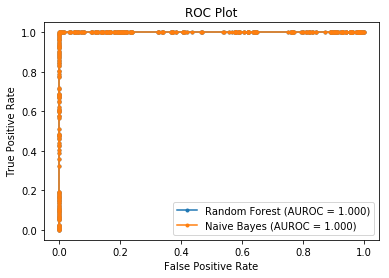

In [42]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()